# Dynamic Programming and Structural Econometrics #3

### Function approximation and interpolation

**Readings:** 
- 📖 Judd, K. L. (1998). Numerical methods in economics. MIT press. Section 7.1-7.5, 8.2
- 📖 Jerome Adda and Russell Cooper “Dynamic Economics. Quantitative Methods and Applications.” Sections 3.5 

by Bertel Schjerning

University of Copenhagen


### Approximation problem

- $ f(x) $ is function of interest, hard to compute  
- Have data on values of $ f(x) $ in $ n $ points
  $ (x_1,\dots,x_n) $  


$$
f(x_1), f(x_2), \dots f(x_n)
$$

- Need to find the approximate value $\hat{f}(x)$ of the function $ f(x) $ in
  arbitrary points $ x \in [a,b]$ 
- We need to extrapolate if $a<x_1$ or $b>x_n$  

### Before we move on we need some standard libraries, tools for sieve interpolation, tools for potting etc. 

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import numpy.linalg as la
from sieve import * 
import matplotlib.pyplot as plt
from scipy import interpolate # Interpolation routines
from numpy.polynomial import polynomial
%matplotlib inline
plt.rcParams.update({'font.size': 20})

### Example
- Let's consider the function $f(x)=\exp(-x/4)\sin(x) + 1/(1+x^2)$
- Assume we have data of values of $f(x)$ in $n$ grid points $x^g=(x_1,\dots,x_m)$ and want to approximate $f(x)$ for any $x$ on the interval $x \in [a, b]$
- Easy to approximate $f(x)$ with a simple linear interpolation
- Can we find a better approximation $\hat{f}(x)$ 

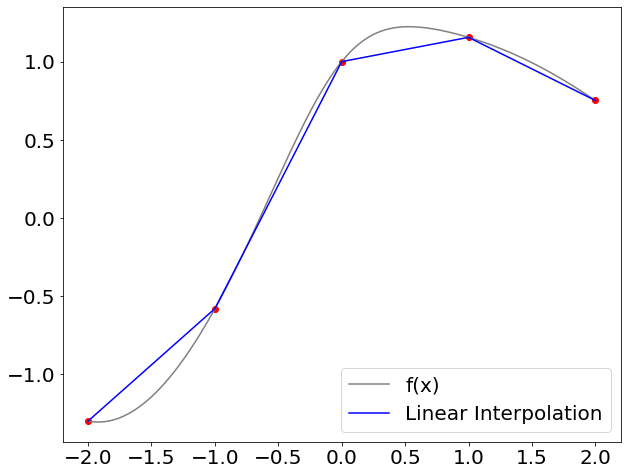

In [2]:
f= lambda x: np.exp(-x/4)*np.sin(x) + 1/(1+x**2)    # function to interpolate/approximate
m=5; a=-2; b=2;            # n:   Number of datapoints and limits for on interval                         
x0 = np.linspace(a,b,m);   # x0:  grid points where we know f(x)
fx0=f(x0)                  # fx0: function values at x0
fhat = interpolate.interp1d(x0,fx0) # returns the interpolation function
plot1d(f, x0, fx0, fhat, label='Linear Interpolation') # use the plotting tool in sieve.py

### Approaches

1. *Piece-wise* approach (connect the dots)  
    - Which functional form to use for connections?
    - Simple lienar interpolation and splines are examples of this approach
    - What are advantages and disadvantages? 


1. Use a *similar* function $s(x)$ to represent $ f(x) $
  between the data points  
    - Which simpler function?  
    - Example: $s(x)$ could be a polynomial 
    - What data should be used?  
    - How to control the accuracy of the approximation? 

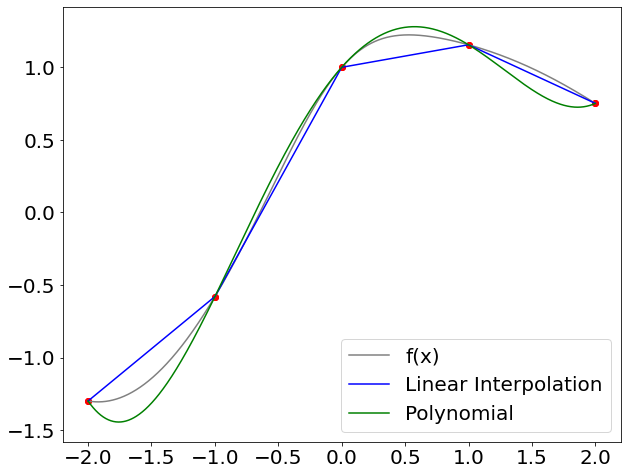

In [3]:
m=5; a=-2; b=2;            # m:   Number of datapoints and limits for on interval                         
fhat = interpolate.interp1d(x0,fx0) # returns the interpolation function
plot1d(f, x0, fx0, fhat, label='Linear Interpolation') # use the the plotting tool
p = polynomial.polyfit(x0,fx0,m-1) # returns the interpolation function
fhat = lambda x: polynomial.polyval(x,p)
plot1d(None, x0, fx0, fhat, label='Polynomial', color='g') # use the the plotting tool

### Sieve approximation
- **An example a local piecewise approach** is to approximate $f(x)$ by a stepwise flat function. 
- This would involve dividing the interval $[a,b]=[x_0,x_{n+1}]$ in to $n+1$ subintervals $ [x_j,x_{j+1}] $, $ j=0,\dots,n$ and approximate $f(x)$ by
    $$f(x) \approx \sum_{j=0}^{n} \alpha_j \mathbb{1}(x_j\le x < x_{j+1}) $$

- **An example of a more smooth approach** is to approximate $f(x)$ (simple algebraic) polynomial of degree $n$ so that 
    $$f(x) \approx p_n(x,\alpha)=\alpha_0 + \alpha_1 x + \alpha_2 x^2 \dots + \alpha_n x^n = \sum_{j=0}^n \alpha_j x^j $$
    
- Both approaches are really a special case of the same class of function, **linear sieves**
- Linear sieves are essentially linear functions with  $n+1$ parameters and corresponding basis functions $\{B_i(x)\}_{i=0}^{n}$ such that
 $$f(x) \approx s(x,\alpha)= \sum_{j=0}^{n} \alpha_j B_j(x) $$
 where $B_j(x)=\mathbb{1}(x_j\le x < x_{j+1}) $ for the step-function and $B_j(x)=x^j$ for a simple algebraic polynomial
   

### How do we approximate $f(x)$ by the sieve $s(x,\alpha)$

Suppose that: 
- We have access to a "data set" $ \{(x_i,f(x_i)\}, i=1,\dots,m$  
- We know the functional form of the $n+1$ basis functions $\{B_i(x)\}_{i=0}^{n}$. For example $B_j(x)=x^j$ in case of simple polynomials

- In the case of a linear sieve we can easily "estimate" $\alpha=\alpha_0,\dots,\alpha_{m-1}$   using linear regression based on a set of $m\ge n+1$ grid points on x and f(x). 

$$ \hat{\alpha} = \arg \min_{\alpha \in \mathbb{R}^n} \sum_{i=1}^{m} \left[f(x_i)-\sum_{j=0}^{n} \alpha_j B_j(x_i) \right]^2
$$

### Can we approximate f(x)?
Can we find $\alpha$? 
- Yes, if we have $m \ge n+1$ data points and $x_i$ are distinct such that $B_i(x_i)$ are not co-linear, all $n+1$ elements in the vector of sieve coefficients $\alpha$ are uniquely identified. 
- Good old OLS $\alpha=\left(B(x)'B(x)\right)^{-1}B(x)'f(x)$


Can we deal with with high order polynomials if x is large? 
- Yes, change of variable from $x\in [a,b]$ to $z\in [-1,1]$. 

Can we approximate f(x). 
- Yes, at least in the nodes (perfectly if $m=n+1$). 
- Before we formally study the theoretical properties, let's just try

In [4]:
f= lambda x: np.exp(-x/4)*np.sin(x) + 1/(1+x**2)    # function to interpolate/approximate
m = 4      # m:   Number of datapoints                     
deg = 3;   # degree of polynmial (n above)  # Try different m and deg (identification/fit)
s1=sieve(m,deg, a=-5, b=5, btype='algpol', gridtype='u') # Try: btype='chebyshev', gridtype='c'
x0=s1.x      # x0: grid points where we know f(x) 
z0=s1.z      # z0: same but on [-1,1] interval (change of varibale to avoid overflow)
fx0=f(x0)    # fx0: function values at x0
B=sieve.basis(x0, s1.deg, s1.btype)  # matrix of basis functions: Try x0 and z0
pB=la.inv(B.T@B)@B.T;   # matrix that projects f(x) on to sieve space
α=pB@fx0 # OLS regression f(x0) against basis functions
print('z0.T ', z0.T, '\nx0.T ', x0.T, '\nfx0.T', fx0.T, '\nB\n', B, '\n(B.T@B)\n', B.T@B, \
      '\nα=inv(B.T@B)@B.T@fx0\n', la.inv(B.T@B)@B.T@fx0, '\nfhat=B.T@α\n', B@α)

z0.T  [[-1.         -0.33333333  0.33333333  1.        ]] 
x0.T  [[-5.         -1.66666667  1.66666667  5.        ]] 
fx0.T [[ 3.38543613 -1.24522526  0.92091925 -0.23627487]] 
B
 [[   1.           -5.           25.         -125.        ]
 [   1.           -1.66666667    2.77777778   -4.62962963]
 [   1.            1.66666667    2.77777778    4.62962963]
 [   1.            5.           25.          125.        ]] 
(B.T@B)
 [[ 4.00000000e+00 -8.88178420e-16  5.55555556e+01  0.00000000e+00]
 [-8.88178420e-16  5.55555556e+01  0.00000000e+00  1.26543210e+03]
 [ 5.55555556e+01  0.00000000e+00  1.26543210e+03  0.00000000e+00]
 [ 0.00000000e+00  1.26543210e+03  0.00000000e+00  3.12928669e+04]] 
α=inv(B.T@B)@B.T@fx0
 [[-0.37924471]
 [ 0.77634516]
 [ 0.07815301]
 [-0.04554065]] 
fhat=B.T@α
 [[ 3.38543613]
 [-1.24522526]
 [ 0.92091925]
 [-0.23627487]]


### Distinction for function approximation: interpolation and curve fitting

- **Interpolation** refers to the situations when **data** on function values is matched **exactly**  
  - The approximation curve passes through the points of the data
  - If parameters of approximating function is "estimated" parameters are *exactly-identified* 
- **Curve fitting** refers to the statistical problem when the data has
  **noise**, the task is to find an approximation for the central
  tendency in the data  
  - Linear and non-linear regression models, econometrics  
  - The model is *over-identified* (there is more data than needed to
    exactly identify the regression function) 
  - For approximations of functions, there is not really noise in our data. However, when the basis does not span the full functional space that $f(x)$ belongs to we will not be able to match all the points and we use ideas similar curve fitting (often linear regression).

### Does sieve $s(x;\alpha)$ converge to $f(x)$ when there are more points and/or basis functions?
- This depends on the function and the choice of basis functions. Let's first focus on polynomials!

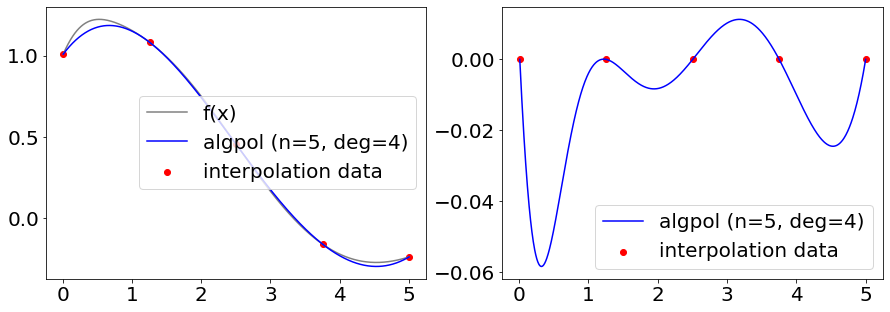

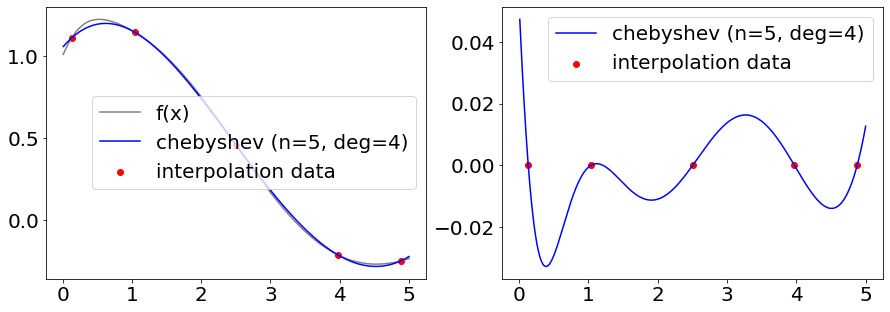

In [5]:
f= lambda x: np.exp(-x/4)*np.sin(x) + 1/(1+x**2)    # function to interpolate/approximate
#f = lambda x: (np.log(x*2/3)+0.5*np.log(x*1/3))    # another function to approximate (only for x>0)
a=0.01; b=5; n=5; deg=4;
sa=sieve(n, deg, a, b, btype='algpol', gridtype='u');    sa.plot1d(f); plt.show() # basis: (ordinary) Algrbraic polynomials
sc=sieve(n, deg, a, b, btype='chebyshev', gridtype='c'); sc.plot1d(f); plt.show() # basis: Chebyshev polynomials

### Least squares approximation

We could also go back to **function approximation** and fit polynomials
of lower degree

- Data set $ \{(x_i,f(x_i)\}, i=1,\dots,m $  
- **Any** functional form $ g(x) $ from class $ G $ that best
  approximates $ f(x) $  


$$
g = \arg\min_{g \in G} \lVert f-g \rVert ^2
$$

### Orthogonal polynomial approximation/interpolation

- Polynomials over domain $ D $  
- Weighting function $ w(x)>0 $  


Inner product

$$
\langle f,g \rangle = \int_D f(x)g(x)w(x)dx
$$

$ \{\phi_i\} $ is a family of orthogonal polynomials w.r.t.
$ w(x) $ iff

$$
\langle \phi_i,\phi_j \rangle = 0, i\ne j
$$

#### Best polynomial approximation in L2-norm

Let $ \mathcal{P}_n $ denote the space of all polynomials of degree $ n $ over $ D $

$$
\lVert f - p \rVert_2 = \inf_{q \in \mathcal{P}_n} \lVert f - q \rVert_2
= \inf_{q \in \mathcal{P}_n}  \left[ \int_D ( f(x)-g(x) )^2 dx  \right]^{\tfrac{1}{2}}
$$

if and only if

$$
\langle f-p,q \rangle = 0, \text{ for all } q \in \mathcal{P}_n
$$

*Orthogonal projection is the best approximating polynomial in L2-norm*

#### Uniform (infinity, sup-) norm

$$
\lVert f(x) - g(x) \rVert_{\infty} = \sup_{x \in D} | f(x) - g(x) |
= \lim_{n \rightarrow \infty} \left[ \int_D ( f(x)-g(x) )^n dx  \right]^{\tfrac{1}{n}}
$$

Measures the absolute difference over the whole domain $ D $

#### Chebyshev (minmax) approximation

What is the best polynomial approximation in the uniform (infinity, sup) norm?

$$
\lVert f - p \rVert_{\infty} = \inf_{q \in \mathcal{P}_n} \lVert f - q \rVert_{\infty}
= \inf_{q \in \mathcal{P}_n}  \sup_{x \in D} | f(x) - g(x) |
$$

Chebyshev proved existence and uniqueness of the best approximating polynomial in uniform norm.

#### Chebyshev polynomials

- $ [a,b] = [-1,1] $ and $ w(x)=(1-x^2)^{(-1/2)} $  
- $ T_n(x)=\cos\big(n\cos^{-1}(x)\big) $  

- Recursive formulas:  
$$
\begin{eqnarray}
T_0(x)=1,\\
T_1(x)=x,\\
T_{n+1}(x)=2x T_n(x) - T_{n-1}(x)
\end{eqnarray}
$$


- Chebyshev polynomials are mutually orthogonal wrt to the weighting function $w(x)=(1-x^2)^{(-1/2)}$ 

- If we approximate f(x) by Chebyshev-least squares, we put equal weight on where we want to minimize the squared error. 
- The leading term in the maximum error of a $n-1$ degree interpolation is $T_n(x)$
- If we want to achieve the best set of interpolation nodes that minimizes the maximum error bound for a degree $n-1$ interpolation, the interpolation nodes $x_1,\dots, x_n$ must be the zeros of $T_n(x)$
$$x_k=cos\left( \frac{2k-1}{2n}\pi\right), \quad \quad, k=1,\dots,n$$

### Let's compare basis for Chebyshev and Algebraic polynomials  

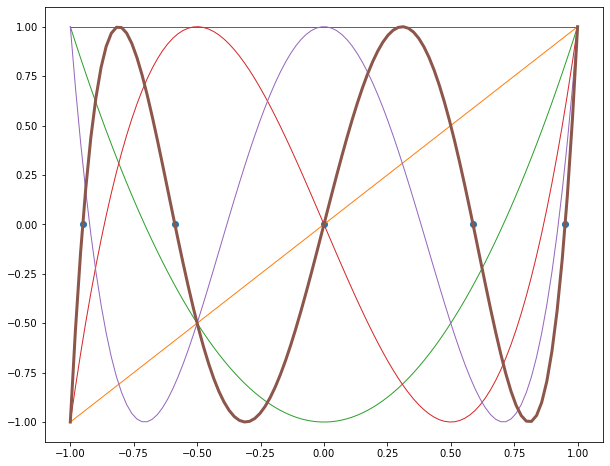

In [30]:
n=5 
# plot nodes
x0,z0 =sieve.grid(n=n, a=0, b=1, gridtype='c') # chebyshev nodes are roots of n-degree chebyshev polynomials
plt.figure(figsize=(10,8))
plt.scatter(z0, z0*0)

# plot Chebyshev polynomials up to degree n
z=np.linspace(-1,1,100).reshape(-1,1)
B=sieve.basis(z, deg=[n], btype=['chebyshev']) 
# B=sieve.basis(z, deg=[n], btype=['algpol']) # Try this and increase degree
plt.plot(z, B[:,:-1], linewidth=1)
plt.plot(z, B[:,-1], linewidth=3)
plt.show()


### Are Chebyshev and Algebraic polynomials orthogonal

In [7]:
n=10;deg=n-1; 
sa=sieve(n, deg, a, b, btype='algpol', gridtype='u');    # basis: (ordinary) Algrbraic polynomials
sc=sieve(n, deg, a, b, btype='chebyshev', gridtype='c'); # basis: Chebyshev polynomials
print('Algebraic polynomials')
disp(sa.B.T@sa.B)
print('Chebyshev polynmials')
disp(sc.B.T@sc.B)


Algebraic polynomials
 10.0000   0.0000   4.0741  -0.0000   2.9474  -0.0000   2.5043  -0.0000   2.2863   0.0000 
  0.0000   4.0741  -0.0000   2.9474  -0.0000   2.5043  -0.0000   2.2863   0.0000   2.1677 
  4.0741  -0.0000   2.9474  -0.0000   2.5043  -0.0000   2.2863   0.0000   2.1677  -0.0000 
 -0.0000   2.9474  -0.0000   2.5043  -0.0000   2.2863   0.0000   2.1677  -0.0000   2.0997 
  2.9474  -0.0000   2.5043  -0.0000   2.2863   0.0000   2.1677  -0.0000   2.0997   0.0000 
 -0.0000   2.5043  -0.0000   2.2863   0.0000   2.1677  -0.0000   2.0997   0.0000   2.0598 
  2.5043  -0.0000   2.2863   0.0000   2.1677  -0.0000   2.0997   0.0000   2.0598   0.0000 
 -0.0000   2.2863   0.0000   2.1677  -0.0000   2.0997   0.0000   2.0598   0.0000   2.0360 
  2.2863   0.0000   2.1677  -0.0000   2.0997   0.0000   2.0598   0.0000   2.0360   0.0000 
  0.0000   2.1677  -0.0000   2.0997   0.0000   2.0598   0.0000   2.0360   0.0000   2.0217 
Chebyshev polynmials
 10.0000  -0.0000  -0.0000   0.0000  -0.0000  -

#### General interval

- Not hard to adapt the polynomials for the general interval
  $ [a,b] $ through linear change of variable  


$$
y = 2\frac{x-a}{b-a}-1
$$

- Orthogonality holds with weights function with the same change of
  variable  

#### Chebyshev approximation algorithm

1. Given $ f(x) $ and $ [a,b] $  
1. Compute Chebyshev interpolation nodes on $ [-1,1] $  
1. Adjust nodes to $ [a,b] $ by change of variable, $ x_i $  
1. Evaluate $ f $ at the nodes, $ f(x_i) $  
1. Compute Chebyshev coefficients $ a_i = g\big(f(x_i)\big) $  
1. Arrive at approximation  


$$
f(x) = \sum_{i=0}^n a_i T_i(x)
$$

#### Accuracy of Chebyshev interpolation

Suppose $ f: [-1,1]\rightarrow R $ is $ C^k $ function for some
$ k\ge 1 $, and let $ I_n $ be the degree $ n $ polynomial
interpolation of $ f $ with nodes at zeros of $ T_{n+1}(x) $.
Then

$$
\lVert f - I_n \rVert_{\infty} \le \left( \frac{2}{\pi} \log(n+1) +1 \right) \frac{(n-k)!}{n!}\left(\frac{\pi}{2}\right)^k \lVert f^{(k)}\rVert_{\infty}
$$

📖 Judd (1988) Numerical Methods in Economics

- achieves *best polynomial approximation in uniform norm*  
- works for smooth functions
- easy to compute  
- but *does not* approximate $ f'(x) $ well  

### Limits to polynomial interpolation/approximation 

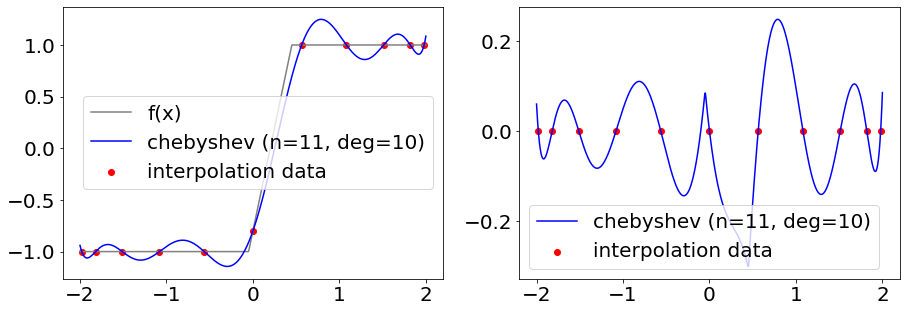

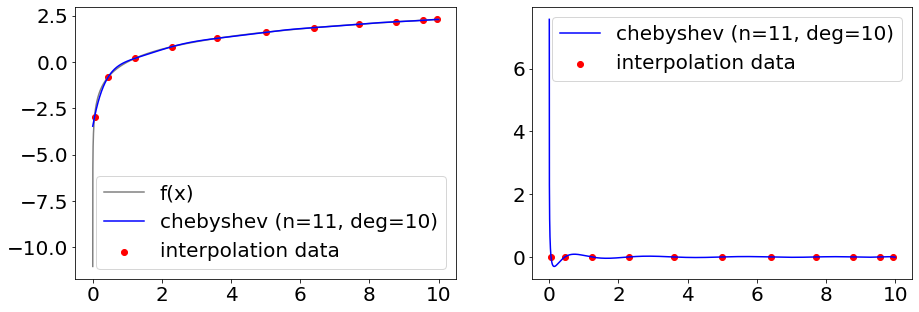

In [8]:
f1 = lambda x: np.minimum(np.maximum(4*(x-0.2),-1),1)   # function to approximate (for a=-1,b=1)
#f1= lambda x: np.exp(-x/4)*np.sin(x) + 1/(1+x**2)       # function to interpolate/approximate (smooth on small intervals)
f2 = lambda x: np.log(x)                               # function to approximate (only for x>0)
deg=10; n=deg+1;    # Try increasing degree and number of nodes
btype='chebyshev'; gridtype='c'; # 
# btype='algpol'; gridtype='u'; 
s1=sieve(n, deg, a=-2, b=2,   btype=btype, gridtype=gridtype);  
s2=sieve(n, deg, a=0.00001, b=10, btype=btype, gridtype=gridtype);  
s1.plot1d(f1); plt.show() # basis: Chebyshev polynomials 
s2.plot1d(f2); plt.show() # basis: (ordinary) Algrbraic polynomials

### Extrapolation

Extrapolation is computing the approximated function outside of the
original data interval

**Should be avoided in general**

- Exact *only* when theoretical properties of the extrapolated function
  are known  
- Can be used with extreme caution and based on the analysis of the model  
- Always try to introduce wider bounds for the grid instead  

**NEVER extrapolate high degree polynomials.**: Nodes a like hands that tries to fix a wild snake. 

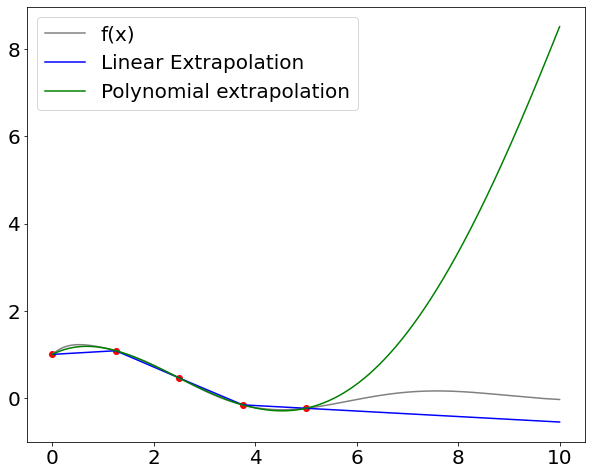

In [9]:
m=5; a=0; b=5; extrapolate=5            # try increasing m (does linear gets worse, does polynmial)               
x0 = np.linspace(a,b,m);                 # x0:  grid points where we know f(x)
x1 =  np.linspace(a,b+extrapolate,100);            # x1:  extended grid points for extrapolation
f= lambda x: np.exp(-x/4)*np.sin(x) + 1/(1+x**2)       # function to interpolate/approximate (smooth on small intervals)
fhat = interpolate.interp1d(x0,f(x0), bounds_error=False, fill_value='extrapolate')    # returns the interpolation function
plot1d(None, x0, f(x0)) # use the the plotting tool
plot1d(f, x1, None, fhat, label='Linear Extrapolation') # use the the plotting tool

α = polynomial.polyfit(x0,f(x0),m-1)     # returns polynomial coeficients
fhat = lambda x: polynomial.polyval(x,α)
plot1d(None, x1, None, fhat, label='Polynomial extrapolation', color='g') # use the the plotting tool
    

### Multidimensional interpolation

- there are multidimensional generalization to all the methods  
- curse of dimensionality in the number of interpolation points when number of dimensions increase  
- sparse Smolyak grids and adaptive sparse grids  
- irregular grids require computationally expensive triangulation in the general case  
- good application for machine learning!  


**Generally much harder!**

### We can do it: Let's try a tensor product basis of Chebyshev polynomials

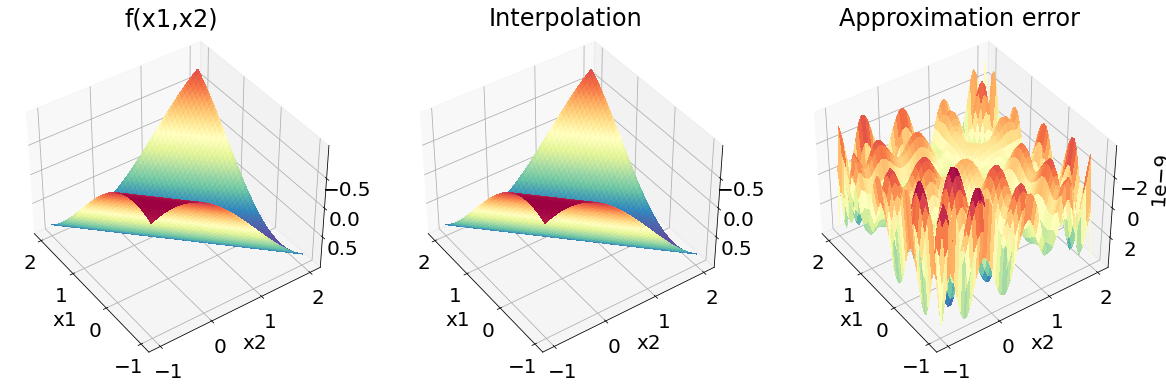

In [10]:
f1 = lambda x: np.sin(np.sum(x, axis=1)).reshape(-1,1)
#f1 = lambda x: np.log(np.sum(np.abs(x), axis=1)).reshape(-1,1)
s1=sieve(n=[11, 11], a=-1, b=2, btype='chebyshev', gridtype='c') # sieve setup
fx=f1(s1.x)        # y-data at nodes s1.x
α = s1.fit(fx)     # sieve coeficients             

neval=[50,50]      # evaluation of function and interpolant on finer grid  
x, z=sieve.grid(n=neval, a=s1.a, b=s1.b, gridtype='u')
fhat=s1.eval(x, α)

# plotting
fig=plot2d(x,f1(x), neval, i=1)
fig=plot2d(x,fhat, neval, fig=fig, i=2, label='Interpolation')
fig=plot2d(x,fhat-f1(x), neval, fig=fig, i=3, label='Approximation error')

### Further learning resources

- [https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html)  
- [https://docs.scipy.org/doc/numpy/reference/generated/numpy.interp.html](https://docs.scipy.org/doc/numpy/reference/generated/numpy.interp.html)  
- M.H. Mudde’s thesis on Chebyshev approximation [http://fse.studenttheses.ub.rug.nl/15406/1/Marieke_Mudde_2017_EC.pdf](http://fse.studenttheses.ub.rug.nl/15406/1/Marieke_Mudde_2017_EC.pdf)  

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(2008) # fix random number sequences
x  = np.sort(np.random.uniform(-5,10,12)) # sorted random numbers on [-5,10]
xr = np.linspace(-5,10,12) # regular grid on [-5,10]

func=lambda x: np.exp(-x/4)*np.sin(x) + 1/(1+x**2) # function to interpolate

### Spline interpolation

Spline = curve composed of independent pieces

**Definition** A function $ s(x) $ on $ [a,b] $ is a spline of
order $ n $ ( = degree $ n-1 $) iff

- $ s $ is $ C^{n-2} $ on $ [a,b] $ (has continuous derivatives
  up to order $ n-2 $),  
- given *knot* points $ a=x_0<x_1<\dots<x_m=b $, $ s(x) $ is a
  polynomial of degree $ n-1 $ on each subinterval
  $ [x_i,x_{i+1}] $, $ i=0,\dots,m-1 $  

#### Cubic splines = spline of order 4

- Data set $ \{(x_i,f(x_i), i=0,\dots,n\} $  
- Functional form $ s(x) = a_i + b_i x + c_i x^2 + d_i x^3 $ on
  $ [x_{i-1},x_i] $ for $ i=1,\dots,n $  
- $ 4n $ unknown coefficients:  
- $ 2n $ equations to make sure each segment passes through its interval points +
  $ 2(n-1) $ equations to ensure two continuous derivatives at each interior point  
- Additional 2 equation for the $ x_0 $ and $ x_n $  
  - $ s''(x_0)=s''(x_n)=0 $ (natural spline)  
  - $ s'(x_0)=\frac{s(x_1)-s(x_0)}{x_1-x_0} $,
    $ s'(x_n)=\frac{s(x_n)-s(x_{n-1})}{x_n-x_{n-1}} $
    (secant-Hermite)  

In [12]:
def plot1(ifunc,fdata=(x,func(x)),f=func,color='b',label='',extrapolation=False):
    '''helper function to make plots'''
    xd = np.linspace(-5,10,1000) # for making continuous lines
    plt.figure(num=1, figsize=(10,8))
    plt.scatter(fdata[0],fdata[1],color='r') # interpolation data
    plt.plot(xd,f(xd),color='grey') # true function
    if extrapolation:
        xdi = xd
    else:
        # restriction for interpolation only
        xdi=xd[np.logical_and(xd>=fdata[0][0],xd<=fdata[0][-1])]
    if ifunc:
        plt.plot(xdi,ifunc(xdi),color=color,label=label)
        if label:
            plt.legend()
    elif label:
        plt.title(label)

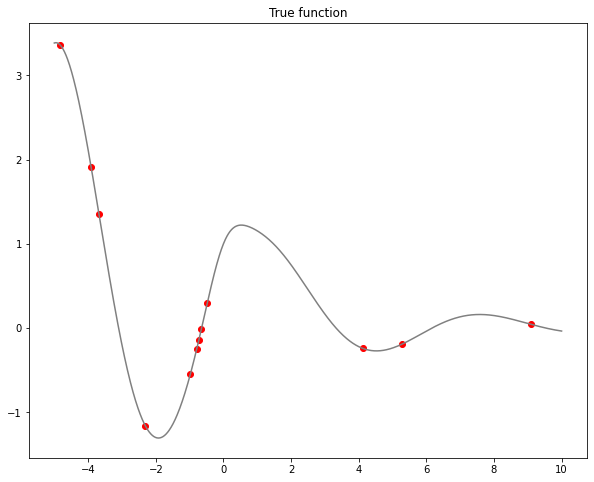

In [13]:
plot1(None,label='True function')

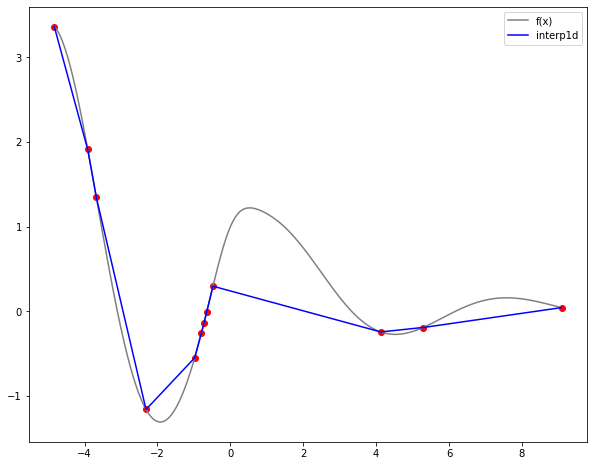

In [14]:
from scipy import interpolate # Interpolation routines
fhat = interpolate.interp1d(x,f(x)) # returns the interpolation function
plot1d(f, x, f(x), fhat,label='interp1d')

In [15]:
help(interpolate.interp1d)

Help on class interp1d in module scipy.interpolate.interpolate:

class interp1d(scipy.interpolate.polyint._Interpolator1D)
 |  interp1d(x, y, kind='linear', axis=-1, copy=True, bounds_error=None, fill_value=nan, assume_sorted=False)
 |  
 |  Interpolate a 1-D function.
 |  
 |  `x` and `y` are arrays of values used to approximate some function f:
 |  ``y = f(x)``. This class returns a function whose call method uses
 |  interpolation to find the value of new points.
 |  
 |  Parameters
 |  ----------
 |  x : (N,) array_like
 |      A 1-D array of real values.
 |  y : (...,N,...) array_like
 |      A N-D array of real values. The length of `y` along the interpolation
 |      axis must be equal to the length of `x`.
 |  kind : str or int, optional
 |      Specifies the kind of interpolation as a string or as an integer
 |      specifying the order of the spline interpolator to use.
 |      The string has to be one of 'linear', 'nearest', 'nearest-up', 'zero',
 |      'slinear', 'quadrati

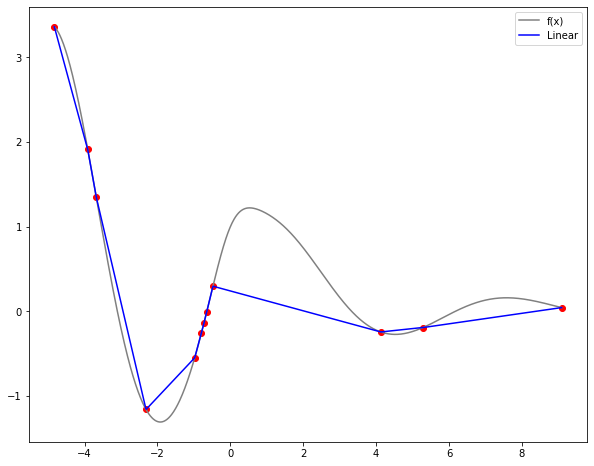

In [16]:
fhat = interpolate.interp1d(x,f(x),kind='linear')
plot1d(f, x, f(x), fhat,label='Linear')

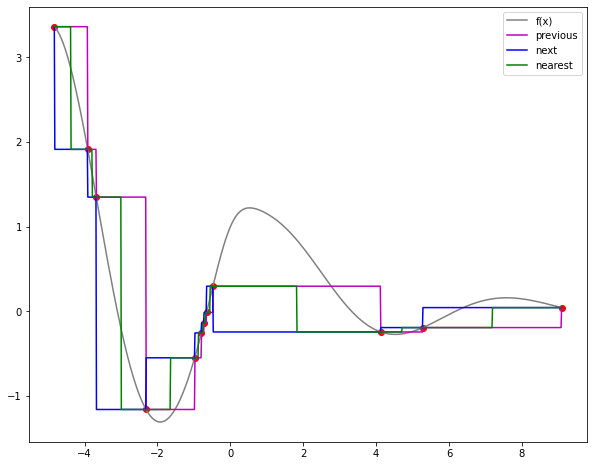

In [17]:
plot1d(f, x, f(x))
for knd, clr in ('previous','m'),('next','b'),('nearest','g'):
    fhat = interpolate.interp1d(x,func(x),kind=knd)
    plot1d(x0=x, fhat=fhat, label=knd,color=clr)
plt.show()

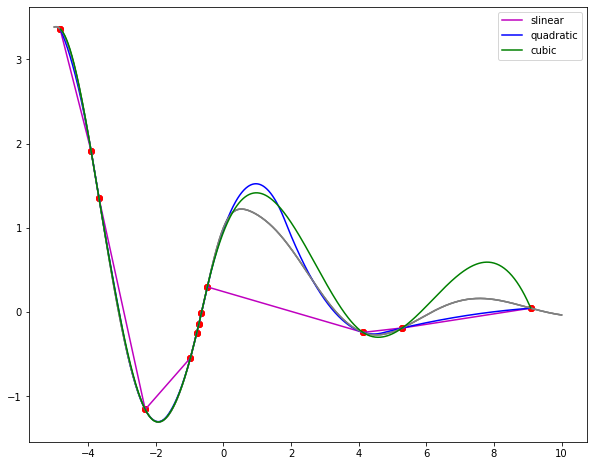

In [18]:
for knd, clr in ('slinear','m'),('quadratic','b'),('cubic','g'):
    fi = interpolate.interp1d(x,f(x),kind=knd)
    plot1(fi,color=clr,label=knd)

Max error with  slinear splines is 7.87872e-01
Max error with  quadratic splines is 5.17170e-01
Max error with  cubic splines is 5.06893e-01


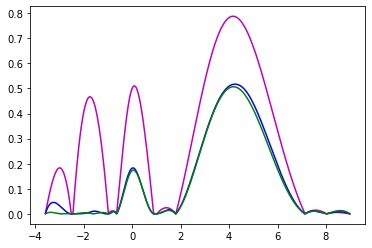

In [19]:
# Approximation errors
x = np.sort(np.random.uniform(-5,10,11))  # generate new data
for knd, clr in ('slinear','m'),('quadratic','b'),('cubic','g'):
    fi = interpolate.interp1d(x,func(x),kind=knd,bounds_error=False)
    xd = np.linspace(-5,10,1000)
    erd=np.abs(func(xd)-fi(xd))
    plt.plot(xd,erd,color=clr)
    print('Max error with  %s splines is %1.5e'%(knd,np.nanmax(erd)))

Max error with  slinear splines is 4.63043e-01
Max error with  quadratic splines is 3.48546e-01
Max error with  cubic splines is 1.89578e-01


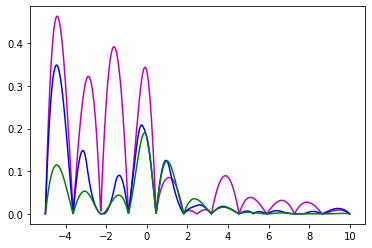

In [20]:
# Approximation errors for regular grid
for knd, clr in ('slinear','m'),('quadratic','b'),('cubic','g'):
    fi = interpolate.interp1d(xr,func(xr),kind=knd,bounds_error=False)
    xd = np.linspace(-5,10,1000)
    erd=np.abs(func(xd)-fi(xd))
    plt.plot(xd,erd,color=clr)
    print('Max error with  %s splines is %1.5e'%(knd,np.nanmax(erd)))

#### Accuracy of the interpolation

How to reduce approximation errors?

- Number of nodes (more is better)  
- Location of nodes (regular is better)  
- Interpolation type (match function of interest)  


*In economic models we usually can control all of these*

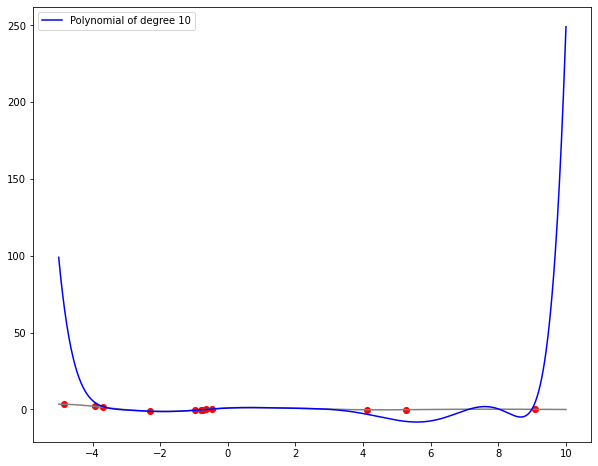

In [21]:
from numpy.polynomial import polynomial
degree = len(x)-1 # passing through all dots
p = polynomial.polyfit(x,func(x),degree)
fi = lambda x: polynomial.polyval(x,p)
plot1(fi,label='Polynomial of degree %d'%degree,extrapolation=True)

(12,)


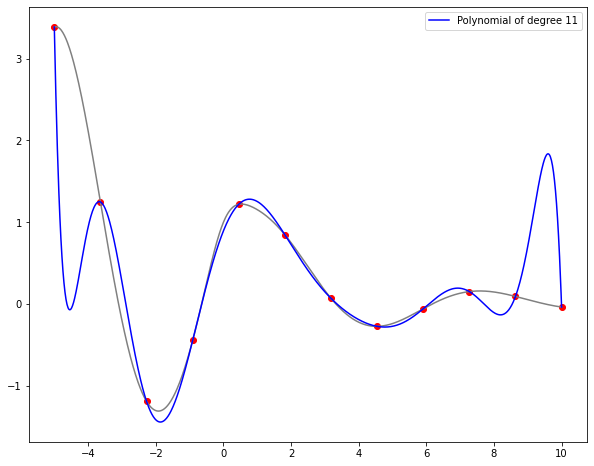

In [22]:
# now with regular grid
degree = len(xr)-1 # passing through all dots
p = polynomial.polyfit(xr,func(xr),degree)
print(p.shape)
fi = lambda x: polynomial.polyval(x,p)
plot1(fi,fdata=(xr,func(xr)),label='Polynomial of degree %d'%degree,extrapolation=True)

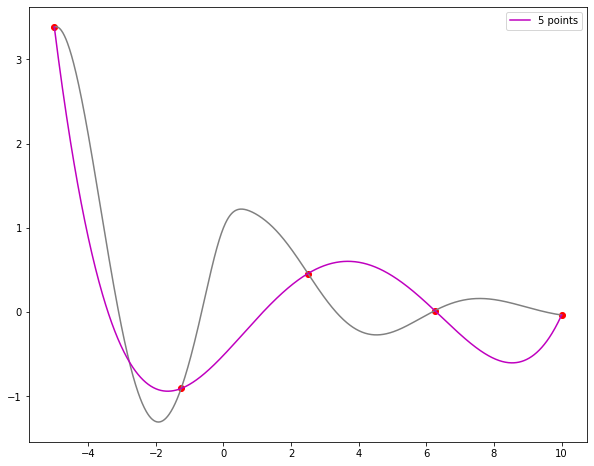

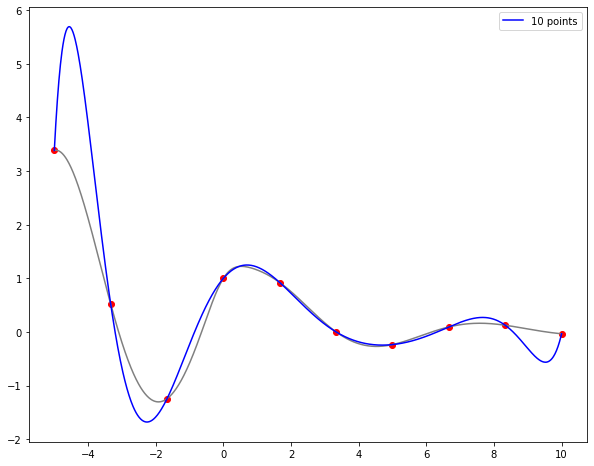

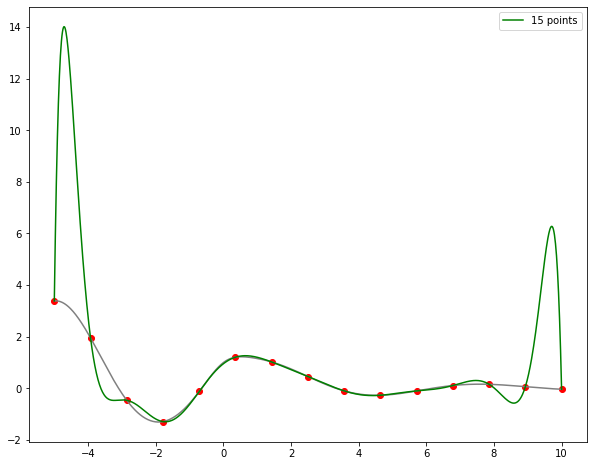

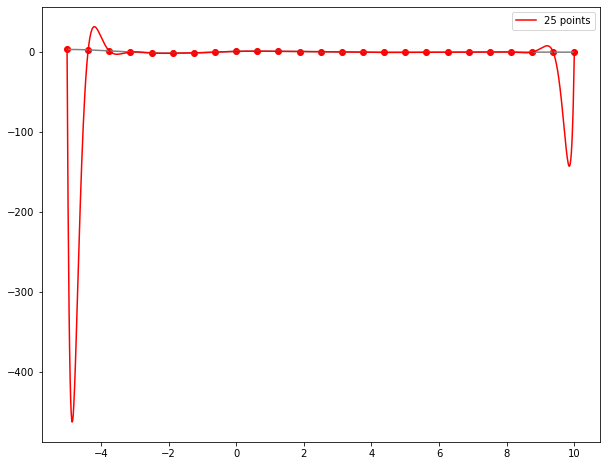

In [23]:
# how number of points affect the approximation (with degree=n-1)
for n, clr in (5,'m'),(10,'b'),(15,'g'),(25,'r'):
    x2 = np.linspace(-5,10,n)
    p = polynomial.polyfit(x2,func(x2),n-1)
    fi = lambda x: polynomial.polyval(x,p)
    plot1(fi,fdata=(x2,func(x2)),label='%d points'%n,color=clr,extrapolation=True)
    plt.show()

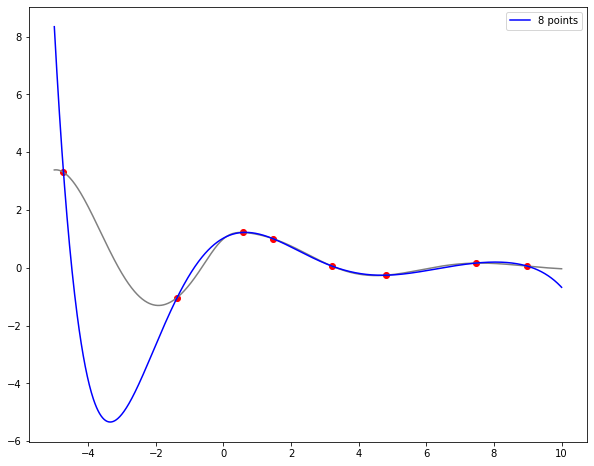

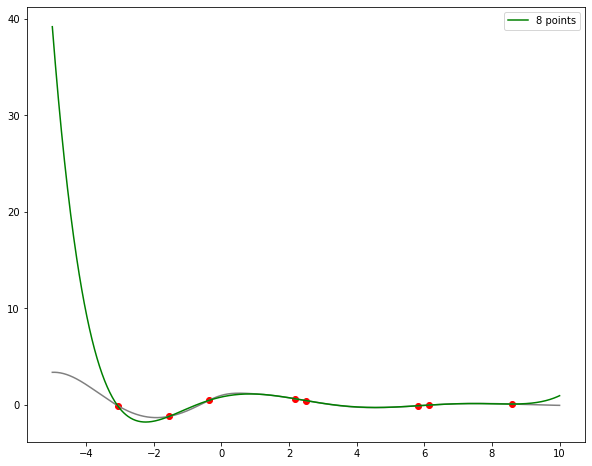

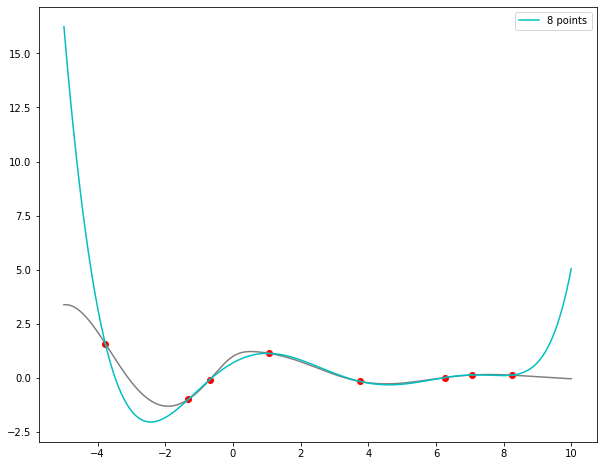

In [24]:
# how locations of points affect the approximation (with degree=n-1)
np.random.seed(2025)
n=8
for clr in 'b','g','c':
    x2 = np.linspace(-4,9,n) + np.random.uniform(-1,1,n) # perturb points a little
    p = polynomial.polyfit(x2,func(x2),n-1)
    fi = lambda x: polynomial.polyval(x,p)
    plot1(fi,fdata=(x2,func(x2)),label='%d points'%n,color=clr,extrapolation=True)
    plt.show()

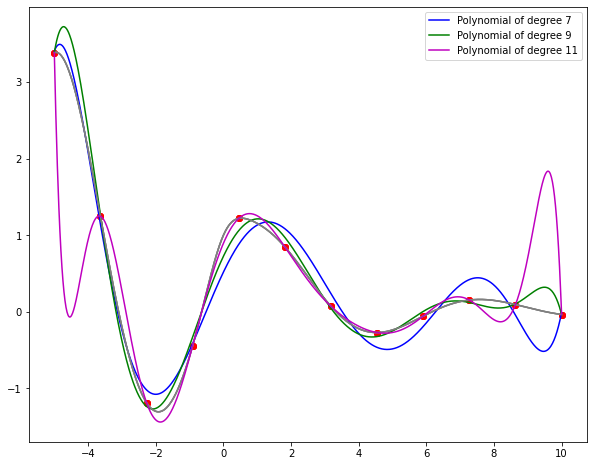

In [25]:
# how degree of the polynomial affects the approximation
for degree, clr in (7,'b'),(9,'g'),(11,'m'):
    p=polynomial.polyfit(xr,func(xr),degree)
    fi=lambda x: polynomial.polyval(x,p)
    plot1(fi,fdata=(xr,func(xr)),label='Polynomial of degree %d'%degree,color=clr,extrapolation=True)